# Convolution Neural Network

CNN allow us to extract the features of the image while maintaining the spatial arrangement of the image. 

They use three concepts to create a feature transformation
- **Convolutional layers** multiply kernel value by the image window and optimize the kernel weights over time using gradient descent
- **Pooling layers** describe a window of an image using a single value which is the max or the average of that window
- **Activation layers** squash the values into a range, typically [0,1] or [-1,1]

Params for each type
- **Convolution**: Kernel, Filters, Padding, Stride
- **Pooling**: Max, 
- **Activation**: Relu, Sigmoid, ...

In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
%matplotlib inline

## Building Intution

Let us get an image of a cheetah

In [2]:
url = "https://source.unsplash.com/U66avewmxJk/400x300"

In [3]:
ghepard = imageio.imread(url)

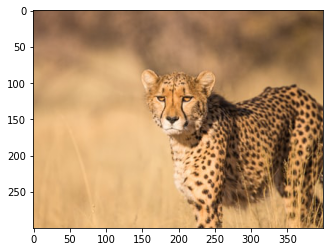

In [4]:
plt.imshow(ghepard);

In [5]:
from skimage.color import rgb2gray

In [6]:
image_gray = rgb2gray(ghepard)

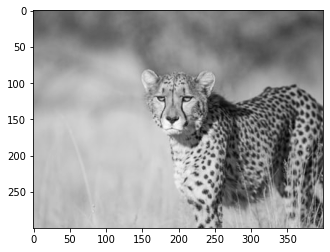

In [7]:
plt.imshow(image_gray, cmap="gray")

In [8]:
image_gray.shape

(300, 400)

In [9]:
image = image_gray.reshape(300, 400, 1)

## What is a Convolution?

Let us apply a convolution with 1 filter

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation

In [11]:
filters = 1
kernal_size = (2, 2)

In [12]:
model1 = Sequential()
model1.add(Conv2D(filters, kernal_size, input_shape=(300,400,1)))

In [13]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 299, 399, 1)       5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [14]:
model1.layers[0].get_weights()

[array([[[[-0.16631621]],
 
         [[ 0.2564637 ]]],
 
 
        [[[ 0.28335744]],
 
         [[-0.6157407 ]]]], dtype=float32), array([0.], dtype=float32)]

In [15]:
def convolution(image, model):
    print("Original Shape:", image.shape)
    image = image/255
    image_batch = np.array([image])
    conv_image = model.predict(image_batch)    
    conv_image = conv_image.squeeze()
    print("New Shape:", conv_image.shape)
    #print(conv_image)
    plt.imshow(conv_image, cmap="gray")

Original Shape: (300, 400, 1)
New Shape: (299, 399)


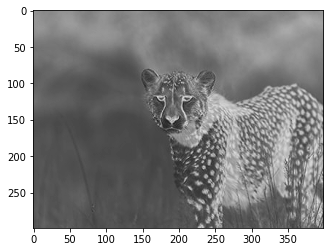

In [16]:
convolution(image, model1)

### With Convolution + Activation

In [17]:
model2 = Sequential()
model2.add(Conv2D(1, (3, 3), input_shape=(300,400,1)))
model2.add(Activation("relu"))

Original Shape: (300, 400, 1)
New Shape: (298, 398)


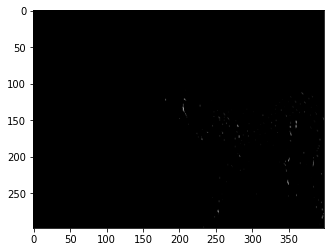

In [18]:
convolution(image, model2)

### With Convolution + Pooling

In [20]:
model3 = Sequential()
model3.add(Conv2D(1, (8, 8), input_shape=(300,400,1)))
model3.add(MaxPooling2D(pool_size=(2,2)))

Original Shape: (300, 400, 1)
New Shape: (146, 196)


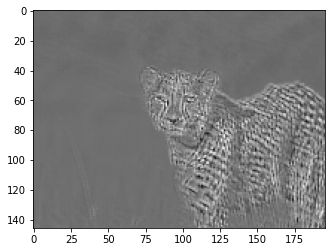

In [21]:
convolution(image, model3)

## Convolution + Activation + Pooling

In [22]:
model4 = Sequential()
model3.add(Conv2D(1, (8, 8), input_shape=(300,400,1)))
model4.add(Activation("relu"))
model4.add(MaxPooling2D(pool_size=(2,2)))

Original Shape: (300, 400, 1)
New Shape: (146, 196)


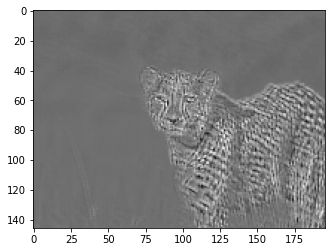

In [23]:
convolution(image, model3)

## Custom Filter

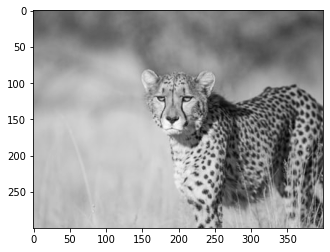

In [26]:
from skimage import io
img = rgb2gray(ghepard)
plt.imshow(img, cmap="gray");

Filtro linee verticali
[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]


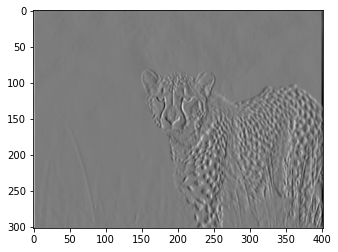

In [27]:
from scipy.signal import convolve2d as conv2d

vline_filter = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])

print("Filtro linee verticali")
print(vline_filter)

img_vline = conv2d(img, vline_filter)/9.
plt.imshow(img_vline, cmap="gray")

Filtro linee orizzontali
[[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


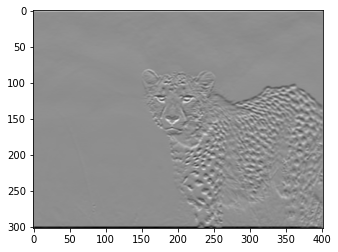

In [30]:
from scipy.signal import convolve2d as conv2d

hline_filter = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])

print("Filtro linee orizzontali")
print(hline_filter)

img_hline = conv2d(img, hline_filter)/9.
plt.imshow(img_hline, cmap="gray");

Filtro angoli (edge detector)
[[ 0  1  0]
 [ 1 -4  1]
 [ 0  1  0]]


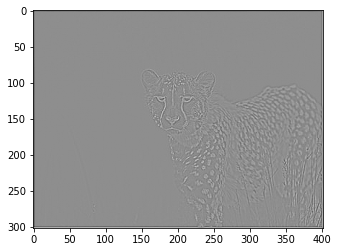

In [31]:
edge_filter = np.array([[0,1,0],[1,-4,1],[0,1,0]])

print("Filtro angoli (edge detector)")
print(edge_filter)

img_edge = conv2d(img, edge_filter)
plt.imshow(img_edge, cmap="gray");

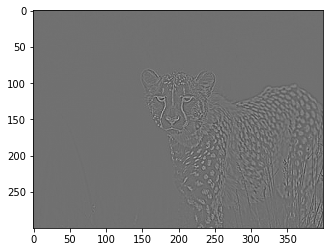

In [32]:
import cv2

edge_filter = np.array([[0,1,0],[1,-4,1],[0,1,0]])

img_edge = cv2.filter2D(img, -1, edge_filter)
plt.imshow(img_edge, cmap="gray");

https://docs.opencv.org/master/d4/d13/tutorial_py_filtering.html